#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


In [3]:
import pandas as pd

In [77]:
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Tasks

##1. Data Cleaning

### Read the dataset

In [9]:

df=pd.read_csv('Datasets/Task1.csv')

### Handle Missing Values

In [11]:
df.isnull().sum()



Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [147]:
#df.fillna('Unknown', inplace=True)
df.fillna( method ='ffill', inplace = True)

/var/folders/l9/qwxlrrn559l3b8wfcq273wt80000gq/T/ipykernel_4326/3362506245.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna( method ='ffill', inplace = True)


In [151]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [153]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,Unknown,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Unknown,Unknown,Not a Pedestrian,Moving Backward,2
1,17:02:00,Monday,Unknown,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,Unknown,Not a Pedestrian,Overtaking,2
2,17:02:00,Monday,Unknown,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Unknown,Not a Pedestrian,Changing lane to the left,1
3,1:06:00,Sunday,Unknown,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,2
4,1:06:00,Sunday,Unknown,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,Unknown,Not a Pedestrian,Overtaking,2


### Correct any inconsistent data entries.

In [133]:
df['Age_band_of_driver'] = pd.to_numeric(df['Age_band_of_driver'], errors='coerce')

### Ensure data types are appropriate for each column.

---



In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Age_band_of_driver           0 non-null      float64
 3   Sex_of_driver                12316 non-null  object 
 4   Educational_level            12316 non-null  object 
 5   Vehicle_driver_relation      12316 non-null  object 
 6   Driving_experience           12316 non-null  object 
 7   Type_of_vehicle              12316 non-null  object 
 8   Owner_of_vehicle             12316 non-null  object 
 9   Service_year_of_vehicle      12316 non-null  object 
 10  Defect_of_vehicle            12316 non-null  object 
 11  Area_accident_occured        12316 non-null  object 
 12  Lanes_or_Medians             12316 non-null  object 
 13  Road_allignment 

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [155]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
count,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,1.832819
std,0.688790,1.007179,0.406082
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000
50%,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,7.000000,8.000000,2.000000


### Identify and analyze patterns in the data.

In [157]:
df['Accident_severity'].unique()

array([2, 1, 0])

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Age_band_of_driver,Type_of_vehicle'>

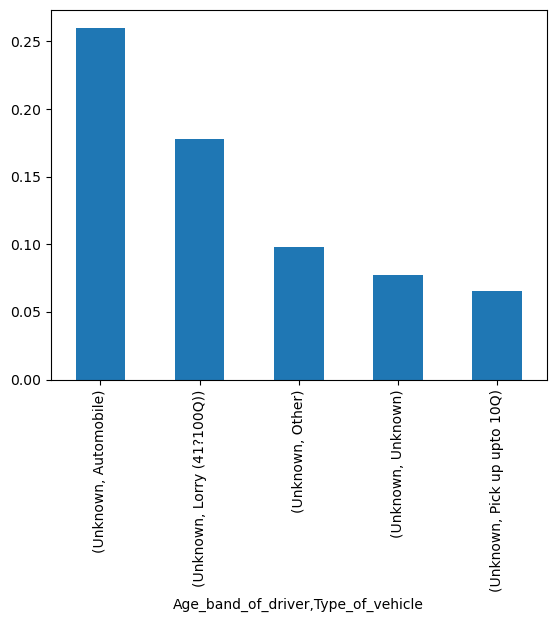

In [159]:
(df[['Age_band_of_driver' , 'Type_of_vehicle']].value_counts().head()/ len(df)).plot.bar()
 

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


<Axes: ylabel='Frequency'>

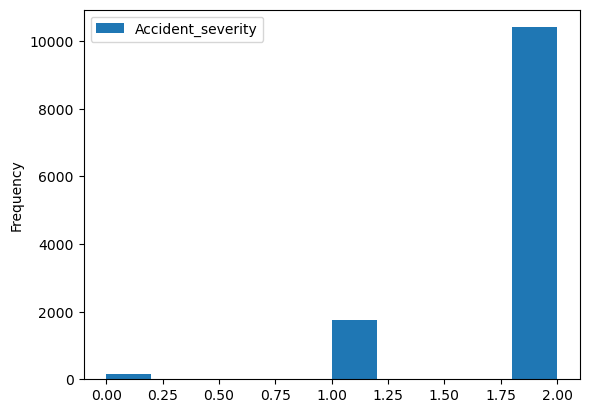

In [175]:
 df[['Age_band_of_driver' , 'Accident_severity']].plot.hist()


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


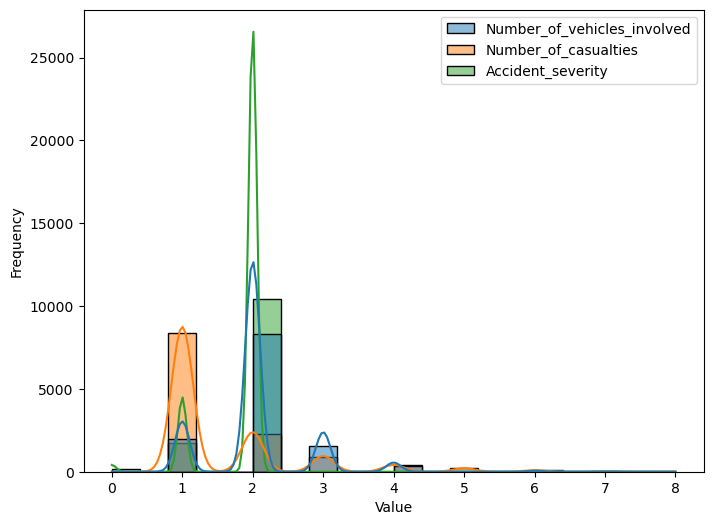

In [181]:
plt.figure(figsize=(8,6))
sns.histplot(df, bins=20, kde=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

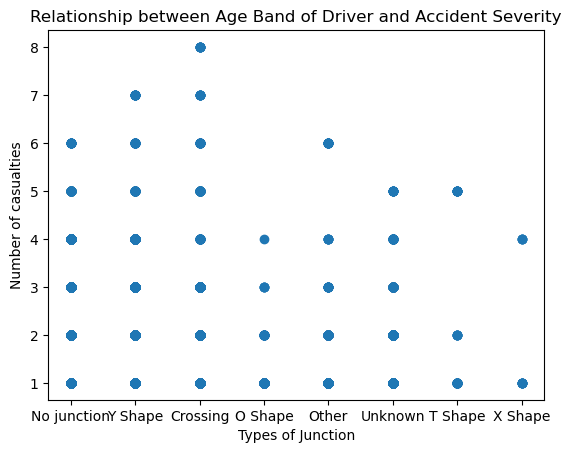

In [179]:
plt.scatter(df['Types_of_Junction'], df['Number_of_casualties'])
plt.xlabel('Types of Junction')
plt.ylabel('Number of casualties')
plt.title('Relationship between Age Band of Driver and Accident Severity')
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>